In [1]:
import numpy as np
import cv2
import torch
from ultralytics import YOLO

In [9]:

def load_model(weights_path):
    model = YOLO(weights_path)
    return model


def get_predictions(model, image_path):
    image = cv2.imread(image_path)
    results = model.predict(image, imgsz=512)
    return results

def generate_bbox(image_path, results, model):
    outputs = {}
    detected_objects = {}
    image = cv2.imread(image_path)
    conf=0.4


    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy()
        confs = result.boxes.conf.cpu().numpy()
        classes = result.boxes.cls.cpu().numpy()

        for i in range(len(boxes)):
            x1, y1, x2, y2 = boxes[i]
            conf = confs[i]
            cls = int(classes[i])
            class_name = model.names[cls]

            if class_name not in detected_objects or detected_objects[class_name][0] < conf:
                detected_objects[class_name] = (conf, (x1, y1, x2, y2))
                

    for class_name, (conf, (x1, y1, x2, y2)) in detected_objects.items():
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        object_slice = image[y1:y2, x1:x2]
        outputs[class_name] = object_slice

    outputs["original_image"] = image
    return outputs

    


def extract_objects(weights_path, image_path):
    model = load_model(weights_path)
    results = get_predictions(model, image_path)
    outputs = generate_bbox(image_path, results, model)
    return outputs




In [10]:
weights_path = "./runs/detect/yolo_small_train/weights/best.pt"  
image_path ="./Examples/FullShot_Example2.jpg" 
outputs = extract_objects(weights_path, image_path)

# Accessing the results
for class_name, img_slice in outputs.items():
    if class_name != "original_image":
        cv2.imshow(class_name, img_slice)
        cv2.waitKey(0)
cv2.imshow("Original Image", outputs["original_image"])
cv2.waitKey(0)
cv2.destroyAllWindows()


0: 512x352 1 TOPWEAR, 1 BOTTOMWEAR, 1 FOOTWEAR, 1 EYEWEAR, 39.9ms
Speed: 0.0ms preprocess, 39.9ms inference, 0.0ms postprocess per image at shape (1, 3, 512, 352)



0: 512x352 1 TOPWEAR, 1 BOTTOMWEAR, 2 FOOTWEARs, 42.0ms
Speed: 0.0ms preprocess, 42.0ms inference, 5.9ms postprocess per image at shape (1, 3, 512, 352)


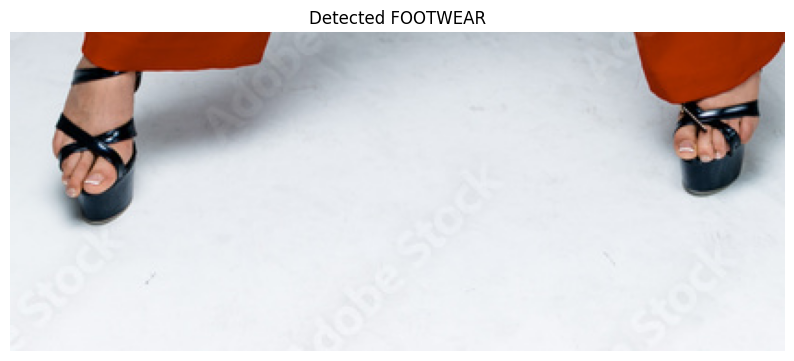

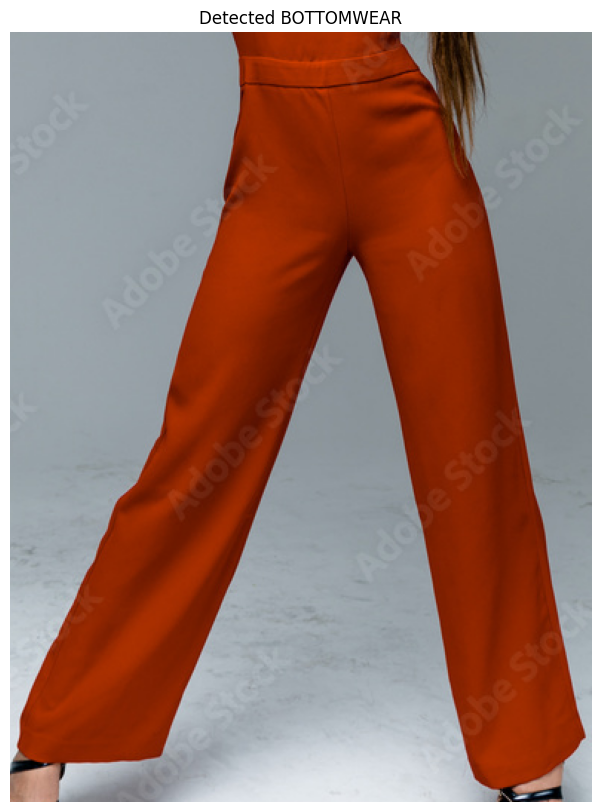

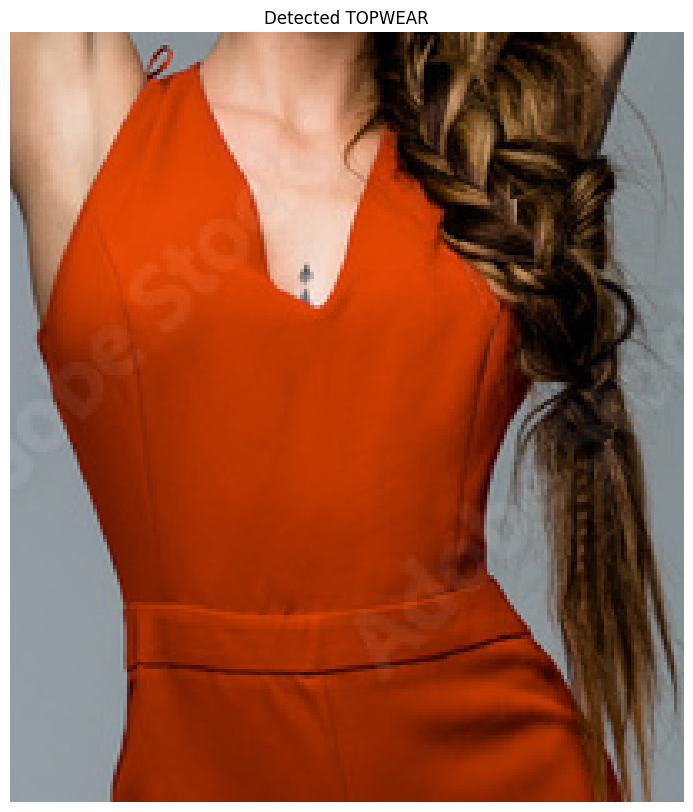

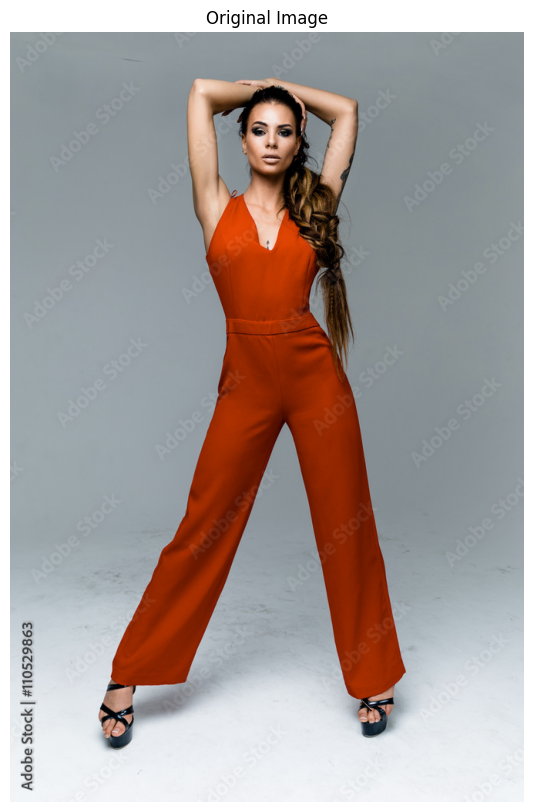

In [14]:
import matplotlib.pyplot as plt
weights_path = "./runs/detect/yolo_small_train/weights/best.pt"  
image_path ="./Examples/FullShot_Example6.jpg"
outputs = extract_objects(weights_path, image_path)

def display_image(image, title="Image"):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Displaying the results in the notebook
for class_name, img_slice in outputs.items():
    if class_name != "original_image":
        display_image(img_slice, title=f"Detected {class_name}")
display_image(outputs["original_image"], title="Original Image")


0: 512x384 1 TOPWEAR, 1 BOTTOMWEAR, 1 FOOTWEAR, 1 EYEWEAR, 112.3ms
Speed: 0.0ms preprocess, 112.3ms inference, 0.0ms postprocess per image at shape (1, 3, 512, 384)


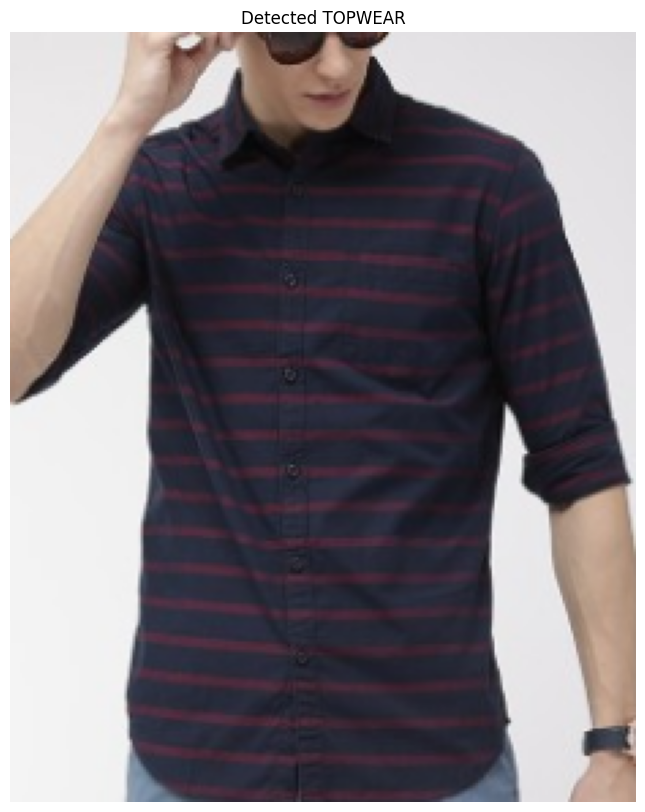

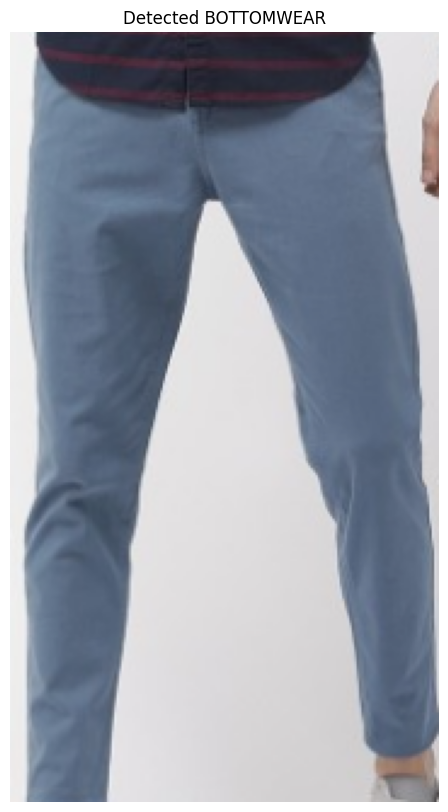

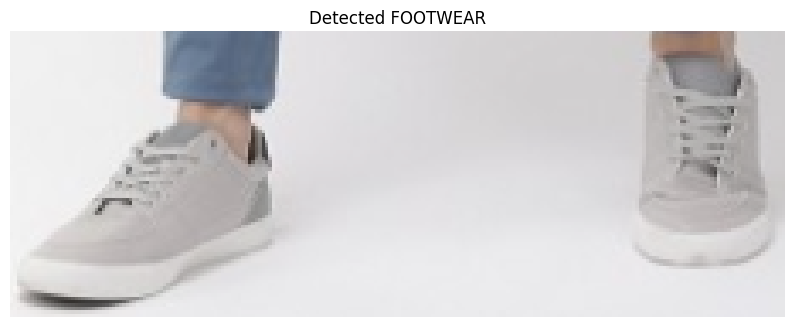

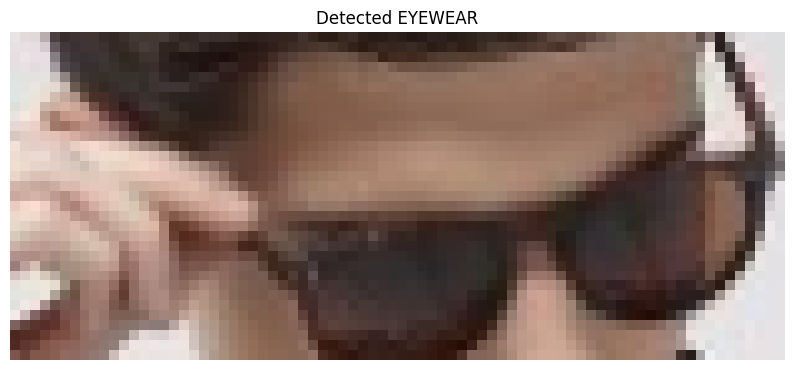

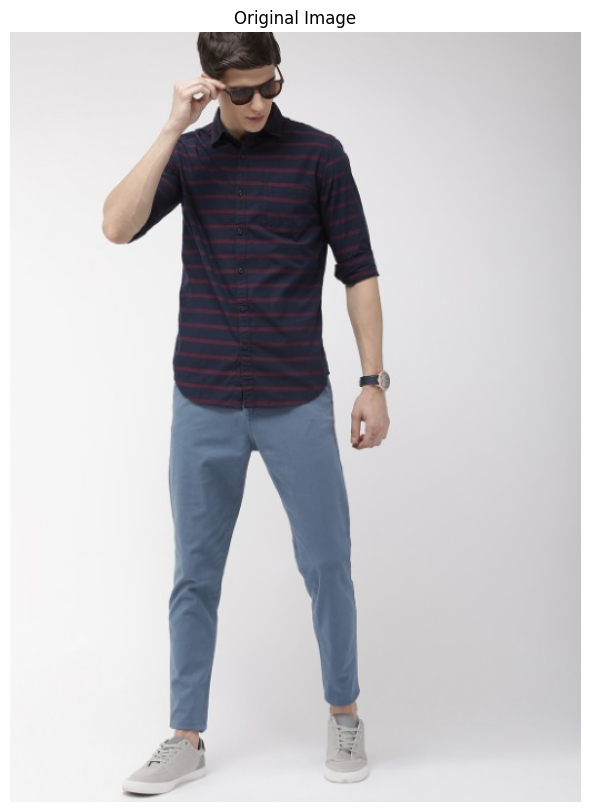

In [16]:
image_path = "./Examples/FullShot_Example8.png"
outputs = extract_objects(weights_path, image_path)

# Displaying the results in the notebook
for class_name, img_slice in outputs.items():
    if class_name != "original_image":
        display_image(img_slice, title=f"Detected {class_name}")
display_image(outputs["original_image"], title="Original Image")


0: 512x352 1 TOPWEAR, 1 FOOTWEAR, 1 HANDBAG, 41.6ms
Speed: 0.0ms preprocess, 41.6ms inference, 0.0ms postprocess per image at shape (1, 3, 512, 352)


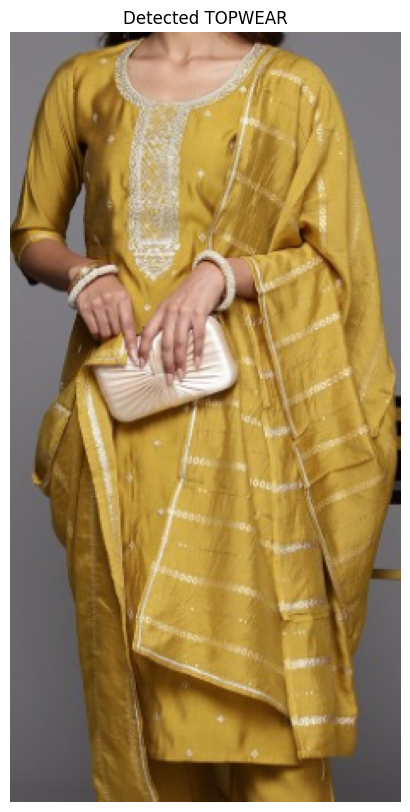

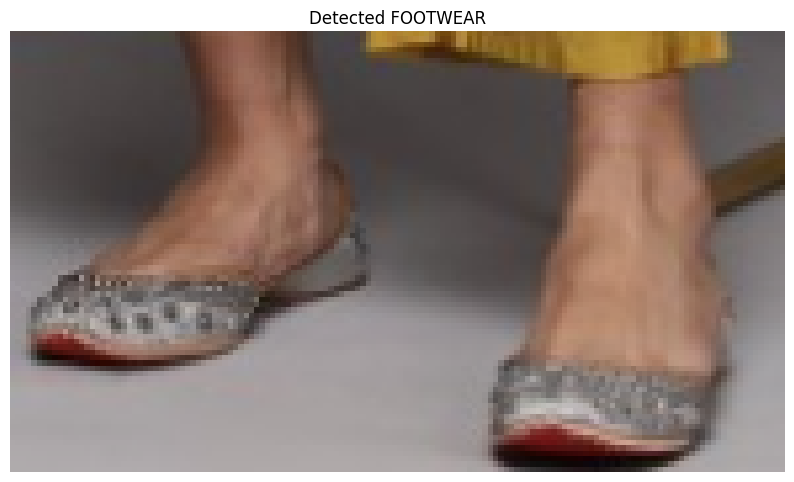

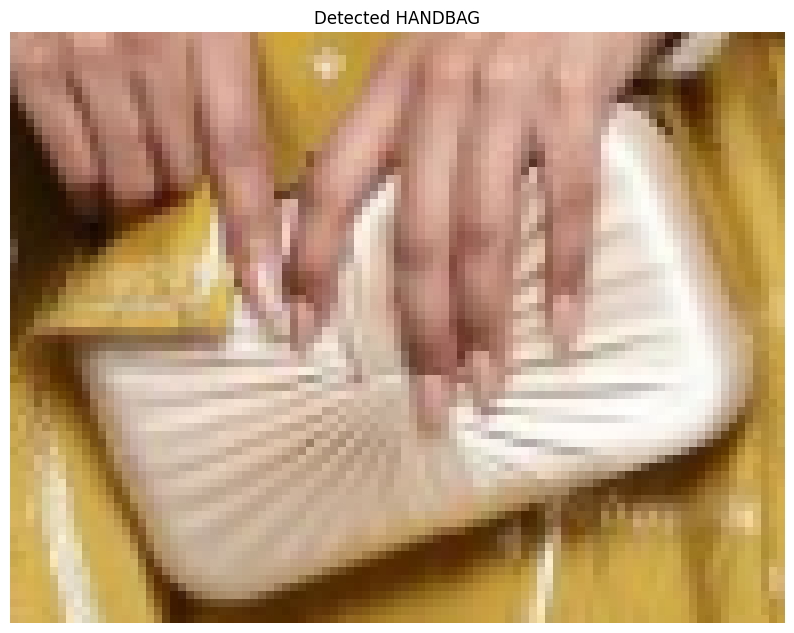

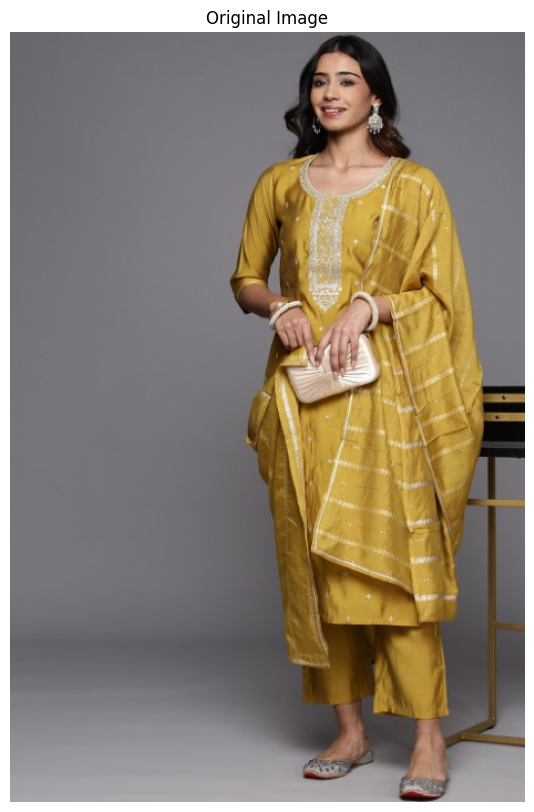

In [17]:
image_path = "./Examples/FullShot_Example9.png"
outputs = extract_objects(weights_path, image_path)

# Displaying the results in the notebook
for class_name, img_slice in outputs.items():
    if class_name != "original_image":
        display_image(img_slice, title=f"Detected {class_name}")
display_image(outputs["original_image"], title="Original Image")


0: 512x384 1 TOPWEAR, 1 BOTTOMWEAR, 1 FOOTWEAR, 30.0ms
Speed: 3.9ms preprocess, 30.0ms inference, 0.0ms postprocess per image at shape (1, 3, 512, 384)


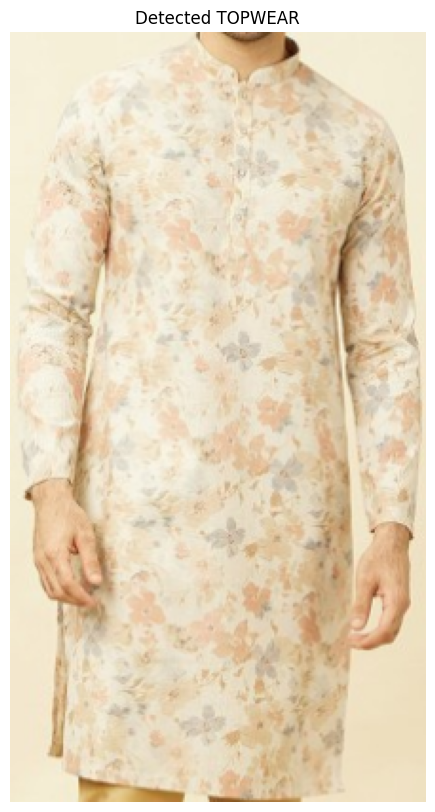

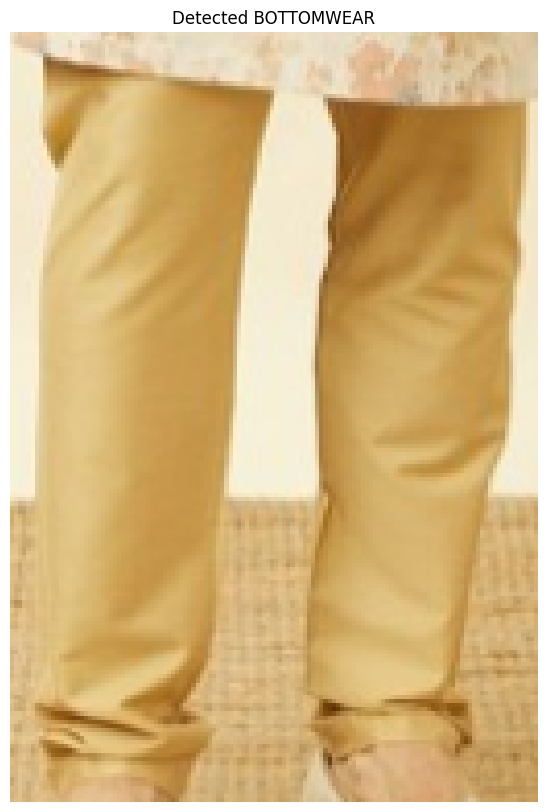

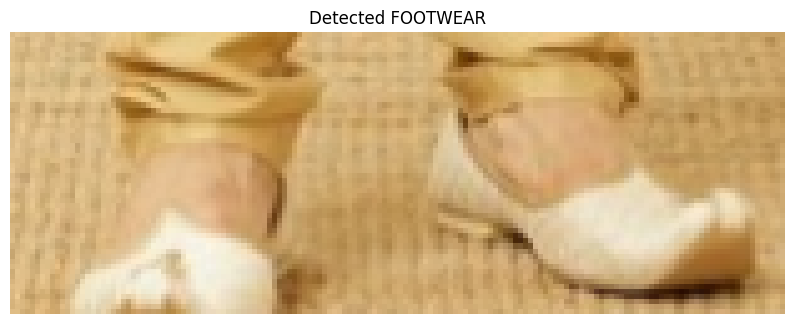

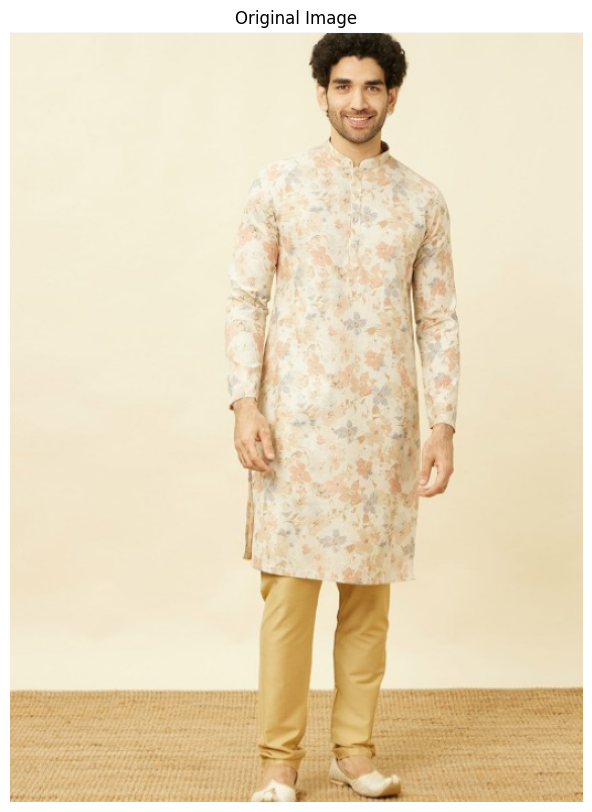

In [18]:
image_path = "./Examples/FullShot_Example10.png"
outputs = extract_objects(weights_path, image_path)

# Displaying the results in the notebook
for class_name, img_slice in outputs.items():
    if class_name != "original_image":
        display_image(img_slice, title=f"Detected {class_name}")
display_image(outputs["original_image"], title="Original Image")